# Importing $B \to D^{*+}\mu^-\bar{\nu}_\mu$ Decay Data  
Decay chain: $B \to D^{*+}\mu^-\bar{\nu}_\mu$ then $D^{*+} \to D^0\pi^+$ and $D^0 \to K^+\pi^-$

In [21]:
import uproot
import pandas
import numpy as np
import itertools 
import matplotlib.pyplot as plt
from pylorentz import Momentum4
from lvec import LVec
import os

    # os.chdir('raw_data/')

mB = 5279.
def bframe_approx(inframe):
    # An approximation for the B momentum in the lab frame
    pz_corr = inframe["B_PZ"] * mB/inframe["B_M"]
    inframe["pz_corr"] = pz_corr
    flightmag = np.sqrt((inframe["B_ENDVERTEX_X"] - inframe["B_OWNPV_X"])**2 + (inframe["B_ENDVERTEX_Y"] - inframe["B_OWNPV_Y"])**2 + (inframe["B_ENDVERTEX_Z"] - inframe["B_OWNPV_Z"])**2)
    cosalpha = (inframe["B_ENDVERTEX_Z"] - inframe["B_OWNPV_Z"])/flightmag # Angle between the flight-direction and the beam line (z)
    inframe["p_corr"] = pz_corr/cosalpha
    tanalphax =  (inframe["B_ENDVERTEX_X"] - inframe["B_OWNPV_X"])/(inframe["B_ENDVERTEX_Z"] - inframe["B_OWNPV_Z"])
    inframe["px_corr"] = pz_corr * tanalphax
    tanalphay =  (inframe["B_ENDVERTEX_Y"] - inframe["B_OWNPV_Y"])/(inframe["B_ENDVERTEX_Z"] - inframe["B_OWNPV_Z"])
    inframe["py_corr"] = pz_corr * tanalphay
    inframe["pe_corr"] = np.sqrt(inframe["p_corr"]**2 + mB**2)


def reco_vars(inframe):
    inframe["reco_q2"] = ((inframe["pe_corr"] - inframe["Dstar_PE"])**2 - (inframe["px_corr"] - inframe["Dstar_PX"])**2 - (inframe["py_corr"] - inframe["Dstar_PY"])**2 - (inframe["pz_corr"] - inframe["Dstar_PZ"])**2)/1.e6
    inframe["missM2"] = ((inframe["pe_corr"] - inframe["Dstar_PE"] - inframe["mu_PE"])**2 - (inframe["px_corr"] - inframe["Dstar_PX"] - inframe["mu_PX"])**2 - (inframe["py_corr"] - inframe["Dstar_PY"] - inframe["mu_PY"])**2 - (inframe["pz_corr"] - inframe["Dstar_PZ"] - inframe["mu_PZ"])**2)/1.e6

def true_vars(inframe):
    inframe["true_q2"] = (inframe["B_TRUEP_E"] - inframe["Dstar_TRUEP_E"])**2 - (inframe["B_TRUEP_X"] - inframe["Dstar_TRUEP_X"])**2 - (inframe["B_TRUEP_Y"] - inframe["Dstar_TRUEP_Y"])**2 - (inframe["B_TRUEP_Z"] - inframe["Dstar_TRUEP_Z"])**2


all_particles = ["B", "Dstar", "D0", "slpi", "Kplus", "piminus", "mu"]
all_list = ["P", "PX", "PY", "PZ", "PE", "TRUEP_E", "TRUEP_X", "TRUEP_Y", "TRUEP_Z", "M"]
br_list = ["%s_%s" % (_p[0], _p[1]) for _p in itertools.product(all_particles, all_list)]

br_list.extend(["B_ENDVERTEX_%s" % _y for _y in ["X","Y","Z"]])
br_list.extend(["B_OWNPV_%s" % _y for _y in ["X","Y","Z"]])

infile = uproot.open("B2Dstmu_11574021_trueTuple.root")["DecayTree"].arrays(br_list, "(abs(D0_TRUEID)==421) & (abs(Dstar_TRUEID)==413) & (abs(B_TRUEID)==511) & (abs(Dstar_MC_MOTHER_ID)==511) & (abs(mu_MC_MOTHER_ID)==511)", library = 'pd') # Just load 1000 to start with
bframe_approx(infile)
reco_vars(infile)
true_vars(infile)

KeyInFileError: not found: 'DecayTree' (with any cycle number)

    Available keys: 'DTTDstmu/MCDecayTree;1', 'DTTDstmu;1'

in file B2Dstmu_11574021_trueTuple.root

In [3]:
infile.columns.to_list()

['B_P',
 'B_PX',
 'B_PY',
 'B_PZ',
 'B_PE',
 'B_TRUEP_E',
 'B_TRUEP_X',
 'B_TRUEP_Y',
 'B_TRUEP_Z',
 'B_M',
 'Dstar_P',
 'Dstar_PX',
 'Dstar_PY',
 'Dstar_PZ',
 'Dstar_PE',
 'Dstar_TRUEP_E',
 'Dstar_TRUEP_X',
 'Dstar_TRUEP_Y',
 'Dstar_TRUEP_Z',
 'Dstar_M',
 'D0_P',
 'D0_PX',
 'D0_PY',
 'D0_PZ',
 'D0_PE',
 'D0_TRUEP_E',
 'D0_TRUEP_X',
 'D0_TRUEP_Y',
 'D0_TRUEP_Z',
 'D0_M',
 'slpi_P',
 'slpi_PX',
 'slpi_PY',
 'slpi_PZ',
 'slpi_PE',
 'slpi_TRUEP_E',
 'slpi_TRUEP_X',
 'slpi_TRUEP_Y',
 'slpi_TRUEP_Z',
 'slpi_M',
 'Kplus_P',
 'Kplus_PX',
 'Kplus_PY',
 'Kplus_PZ',
 'Kplus_PE',
 'Kplus_TRUEP_E',
 'Kplus_TRUEP_X',
 'Kplus_TRUEP_Y',
 'Kplus_TRUEP_Z',
 'Kplus_M',
 'piminus_P',
 'piminus_PX',
 'piminus_PY',
 'piminus_PZ',
 'piminus_PE',
 'piminus_TRUEP_E',
 'piminus_TRUEP_X',
 'piminus_TRUEP_Y',
 'piminus_TRUEP_Z',
 'piminus_M',
 'mu_P',
 'mu_PX',
 'mu_PY',
 'mu_PZ',
 'mu_PE',
 'mu_TRUEP_E',
 'mu_TRUEP_X',
 'mu_TRUEP_Y',
 'mu_TRUEP_Z',
 'mu_M',
 'B_ENDVERTEX_X',
 'B_ENDVERTEX_Y',
 'B_ENDVERTEX_Z',


# Function Definitions

In [4]:
def lorentz_boost_lvec(mom1, mom2, valid_mask=None):
    if valid_mask is None:
        valid_mask = np.ones(mom1.shape[0], dtype=bool)  

    valid_mom1, valid_mom2 = mom1[valid_mask], mom2[valid_mask]


    p1x, p1y, p1z, E1 = valid_mom1[:, 1], valid_mom1[:, 2], valid_mom1[:, 3], valid_mom1[:, 0]
    p2x, p2y, p2z, E2 = valid_mom2[:, 1], valid_mom2[:, 2], valid_mom2[:, 3], valid_mom2[:, 0]

    mom1_valid = LVec(p1x, p1y, p1z, E1)

    b2_x, b2_y, b2_z = -p2x / E2, -p2y / E2, -p2z / E2

    mom1_boosted = mom1_valid.boost(b2_x, b2_y, b2_z)

    return np.column_stack((mom1_boosted.E, mom1_boosted.px, mom1_boosted.py, mom1_boosted.pz))

def valid_configs(b1,b2,b3):
    beta_sq = b1**2 + b2**2 + b3**2
    valid_mask = beta_sq <= 1

    return valid_mask

def dot(vec1, vec2):
    return np.einsum('ij,ij->i', vec1, vec2)  # Element-wise dot product for each pair of vectors

def cross(vec1, vec2):
    return np.cross(vec1, vec2)  # Element-wise cross product for each pair of vectors


def signed_angle(a, b):
    # Compute the dot product of vectors a and b
    dot_product = np.einsum('ij,ij->i', a, b)

    # Compute the norms of a and b
    norm_a = np.linalg.norm(a, axis=1)
    norm_b = np.linalg.norm(b, axis=1)

    # Compute the cosine of the angle between a and b
    cos_angle = dot_product / (norm_a * norm_b)

    # Clip cos_angle to handle any floating-point precision issues
    cos_angle = np.clip(cos_angle, -1.0, 1.0)

    # Compute the angle in radians using arccos
    angle = np.arccos(cos_angle)

    # Compute the cross product to determine the sign of the angle
    cross_product = np.cross(a, b)

    # Compute the sign of the cross product along the third axis
    sign = np.sign(cross_product[:, 2])

    # Adjust angle to be between 0 and 2π
    angle = np.where(sign >= 0, angle, 2 * np.pi - angle)

    return angle

def invariant_mass_squared(p):
    M2 = []
    for i in range(len(p)):
        M2.append(p[i][0]**2 - p[i][1]**2 - p[i][2]**2 - p[i][3]**2)
    M2 = np.array(M2)
    return M2

### Run this cell always to obtain valid configurations!

In [5]:
B_reco = np.array([infile['pe_corr'], infile['px_corr'], infile['py_corr'], infile['pz_corr']]).T
Dstar_reco = np.array([infile['Dstar_PE'], infile['Dstar_PX'], infile['Dstar_PY'], infile['Dstar_PZ']]).T
mu_reco = np.array([infile['mu_PE'], infile['mu_PX'], infile['mu_PY'], infile['mu_PZ']]).T
nu_reco = B_reco - Dstar_reco - mu_reco
W_reco = B_reco - Dstar_reco
mom1 = mu_reco
mom2 = W_reco
mom3 = nu_reco
mom4 = B_reco

p1x, p1y, p1z, E1 = mom1.T[1], mom1.T[2], mom1.T[3], mom1.T[0]
p2x, p2y, p2z, E2 = mom2.T[1], mom2.T[2], mom2.T[3], mom2.T[0]
p3x, p3y, p3z, E3 = mom3.T[1], mom3.T[2], mom3.T[3], mom3.T[0]
p4x, p4y, p4z, E4 = mom4.T[1], mom4.T[2], mom4.T[3], mom4.T[0]

mom2 = LVec(p2x, p2y, p2z, E2)
mom4 = LVec(p4x, p4y, p4z, E4)

b2_x, b2_y, b2_z = -p2x/E2, -p2y/E2, -p2z/E2
b4_x, b4_y, b4_z = -p4x/E4, -p4y/E4, -p4z/E4

valid_indices = valid_configs(b2_x, b2_y, b2_z)
valid_energy_mask = nu_reco.T[0] >= 0
valid_energy_list = (valid_energy_mask)
future_energy = E3 + (p3x * b4_x + p3y * b4_y + p3z * b4_z)
valid_future_energy_mask = future_energy >= 0

final_valid_mask = ~(~valid_indices | ~valid_energy_mask | ~valid_future_energy_mask)

valid_indices = final_valid_mask

proportion_false = np.mean(~valid_indices)
print(f"Number of configurations: {len(valid_indices)}")
print(f"Proportion of invalid configurations: {proportion_false:.2%}")
print(f"Number of invalid configurations: {np.sum(~valid_indices)}")


Number of configurations: 560001
Proportion of invalid configurations: 2.08%
Number of invalid configurations: 11635


# Four-momenta in the Lab Frame  
B momentum must be approximated and neutrino momentum must be calculated



### **Reconstructed Variables:** (run either this or cell below)

In [6]:
B_momentum = np.array([infile['pe_corr'], infile['px_corr'], infile['py_corr'], infile['pz_corr']]).T
Dstar_momentum = np.array([infile['Dstar_PE'], infile['Dstar_PX'], infile['Dstar_PY'], infile['Dstar_PZ']]).T
mu_momentum = np.array([infile['mu_PE'], infile['mu_PX'], infile['mu_PY'], infile['mu_PZ']]).T
neutrino_momentum = B_momentum - Dstar_momentum - mu_momentum
D0_momentum = np.array([infile['D0_PE'], infile['D0_PX'], infile['D0_PY'], infile['D0_PZ']]).T
slpi_momentum = np.array([infile['slpi_PE'], infile['slpi_PX'], infile['slpi_PY'], infile['slpi_PZ']]).T

W_momentum = B_momentum - Dstar_momentum

### **True Variables:**
Run first with reco variables to obtain the invalid configurations. This will save the invalid indices so that these configurations can also be discarded for the true case also.

In [13]:
B_momentum = np.array([infile['B_TRUEP_E'], infile['B_TRUEP_X'], infile['B_TRUEP_Y'], infile['B_TRUEP_Z']]).T
Dstar_momentum = np.array([infile['Dstar_TRUEP_E'], infile['Dstar_TRUEP_X'], infile['Dstar_TRUEP_Y'], infile['Dstar_TRUEP_Z']]).T
mu_momentum = np.array([infile['mu_TRUEP_E'], infile['mu_TRUEP_X'], infile['mu_TRUEP_Y'], infile['mu_TRUEP_Z']]).T
neutrino_momentum = B_momentum - Dstar_momentum - mu_momentum
D0_momentum = np.array([infile['D0_TRUEP_E'], infile['D0_TRUEP_X'], infile['D0_TRUEP_Y'], infile['D0_TRUEP_Z']]).T
slpi_momentum = np.array([infile['slpi_TRUEP_E'], infile['slpi_TRUEP_X'], infile['slpi_TRUEP_Y'], infile['slpi_TRUEP_Z']]).T

W_momentum = B_momentum - Dstar_momentum

### $q^2 = (p_B - p_{D^{*+}})^2$

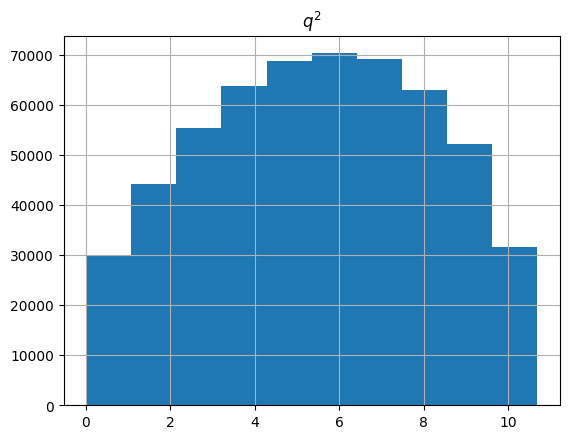

In [14]:
q2 = invariant_mass_squared(W_momentum)/1e6
q2 = q2[valid_indices]

plt.hist(q2)
plt.title(r'$q^2$')
plt.grid()
plt.show()

### $cos \theta_l$ defined in the $W^-$ rest frame as the angle between the muon and the z-axis
**NB:** $\hat{z} = \vec{p}_{D^{*+}}/|\vec{p}_{D^{*+}}|$ in the B rest frame

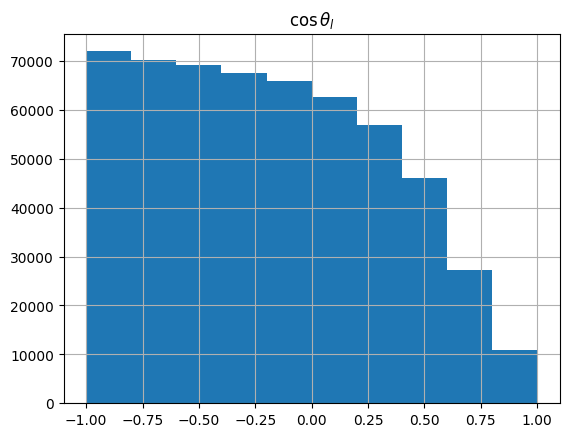

In [15]:
mu_W_boosted = lorentz_boost_lvec(mu_momentum, W_momentum,valid_indices)
mu_W_boosted_p = mu_W_boosted[:,1:]
W_p = W_momentum[:,1:]

# W_B_boosted = lorentz_boost_lvec(W_momentum, B_momentum, valid_indices)
# W_B_boosted_p = W_B_boosted[:,1:]

# z_axis = W_B_boosted_p / np.linalg.norm(W_B_boosted_p, axis=1, keepdims=True)

# B_W_boosted = lorentz_boost_lvec(B_momentum, W_momentum, valid_indices)
# B_W_boosted_p = B_W_boosted[:,1:]

# z_axis = B_W_boosted_p / np.linalg.norm(B_W_boosted_p, axis=1, keepdims=True)

D_star_B_boosted = lorentz_boost_lvec(Dstar_momentum, B_momentum, valid_indices)
D_star_B_boosted_p = D_star_B_boosted[:,1:]

z_axis = D_star_B_boosted_p / np.linalg.norm(D_star_B_boosted_p, axis=1, keepdims=True)

cos_theta_l = dot(mu_W_boosted_p,z_axis)/np.sqrt(dot(mu_W_boosted_p,mu_W_boosted_p))
plt.hist(cos_theta_l)
plt.title(r'$\cos\theta_l$')
plt.grid()
plt.show()

### $cos \theta_d$ defined in the $D^{*+}$ rest frame as the angle between the $D^0$ and the earlier defined z-axis

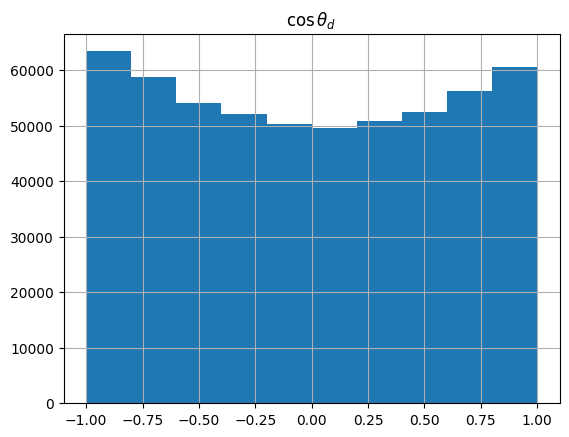

In [16]:
D0_Dstar_boosted = lorentz_boost_lvec(D0_momentum, Dstar_momentum, valid_indices)
D0_Dstar_boosted_p = D0_Dstar_boosted[:,1:]

# B_Dstar_boosted = lorentz_boost_lvec(B_momentum, Dstar_momentum, valid_indices)
# B_Dstar_boosted_p = B_Dstar_boosted[:,1:]
# z_axis = -1*B_Dstar_boosted_p / np.linalg.norm(B_Dstar_boosted_p, axis=1, keepdims=True)

D_star_B_boosted = lorentz_boost_lvec(Dstar_momentum, B_momentum, valid_indices)
D_star_B_boosted_p = D_star_B_boosted[:,1:]

z_axis = D_star_B_boosted_p / np.linalg.norm(D_star_B_boosted_p, axis=1, keepdims=True)

cos_theta_d = dot(D0_Dstar_boosted_p,z_axis)/np.sqrt(dot(D0_Dstar_boosted_p,D0_Dstar_boosted_p))
plt.hist(cos_theta_d)
plt.title(r'$\cos\theta_d$')
plt.grid()
plt.show()

### $\phi$ is defined in the B rest frame as the angle between the planes of the decay products from B and $D^{*+}$ respectively

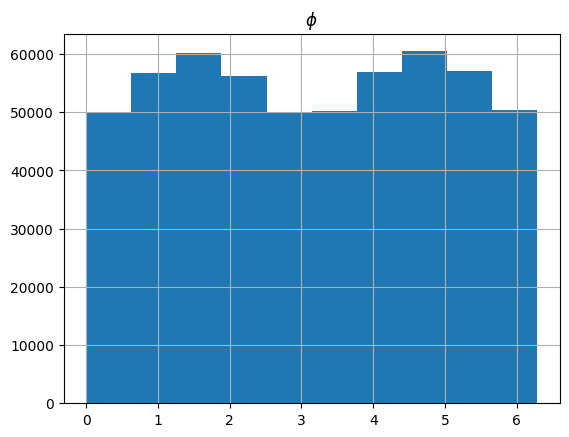

In [10]:
mu_B_boosted = lorentz_boost_lvec(mu_momentum, B_momentum, valid_indices)
mu_B_boosted_p = mu_B_boosted[:,1:]

neutrino_B_boosted = lorentz_boost_lvec(neutrino_momentum, B_momentum, valid_indices)
neutrino_B_boosted_p = neutrino_B_boosted[:,1:]

D0_B_boosted = lorentz_boost_lvec(D0_momentum, B_momentum, valid_indices)
D0_B_boosted_p = D0_B_boosted[:,1:]

slpi_B_boosted = lorentz_boost_lvec(slpi_momentum, B_momentum, valid_indices)
slpi_B_boosted_p = slpi_B_boosted[:,1:]

mu_neutrino_plane = cross(mu_B_boosted_p,neutrino_B_boosted_p)
D0_slpi_plane = cross(D0_B_boosted_p,slpi_B_boosted_p)

phi = signed_angle(mu_neutrino_plane, D0_slpi_plane)
plt.hist(phi)
plt.title(r'$\phi$')
plt.grid()
plt.show()

### Missing mass squared due to the undetected neutrino

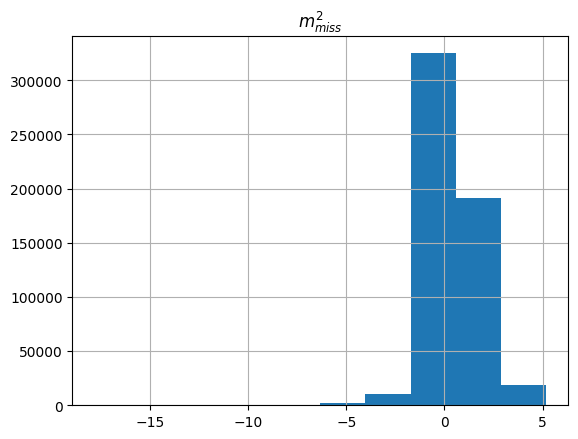

In [11]:
missing_mass_squared = invariant_mass_squared(neutrino_momentum)/1e6
missing_mass_squared = missing_mass_squared[valid_indices]
plt.hist(missing_mass_squared)
plt.title(r'$m^2_{miss}$')
plt.grid()
plt.show()

### Muon Energy in the B rest frame

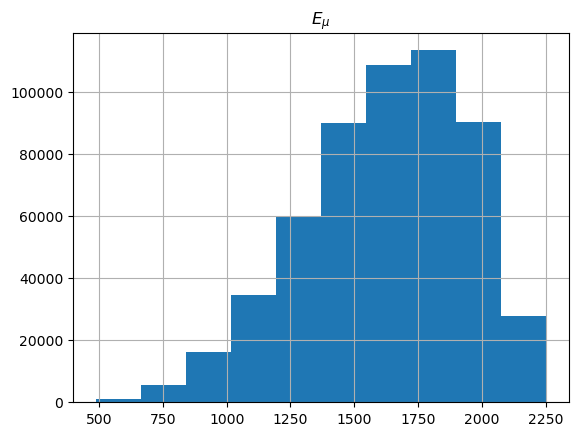

In [11]:
E_mu_B_frame = mu_B_boosted[:,0]
plt.hist(E_mu_B_frame)
plt.title(r'$E_{\mu}$')
plt.grid()
plt.show()

## Final Plotted Decay Quantities
Change file names to reco/true dpending on what being used.

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Data and titles for the plots
data = [cos_theta_l, cos_theta_d, phi, q2, missing_mass_squared, E_mu_B_frame]
titles = [r'$\cos\theta_l$', r'$\cos\theta_D$', r'$\phi$', r'$q^2$']

# Loop through the data and plot each one
for i, ax in enumerate(axs.flat):
    ax.hist(data[i])
    ax.set_xlabel(titles[i], fontsize = 14)
    

plt.tight_layout()
fig.suptitle('True variables', fontsize=16, y=1.04)
plt.savefig('true_fit_variables.png', dpi=300, bbox_inches='tight')
plt.show()

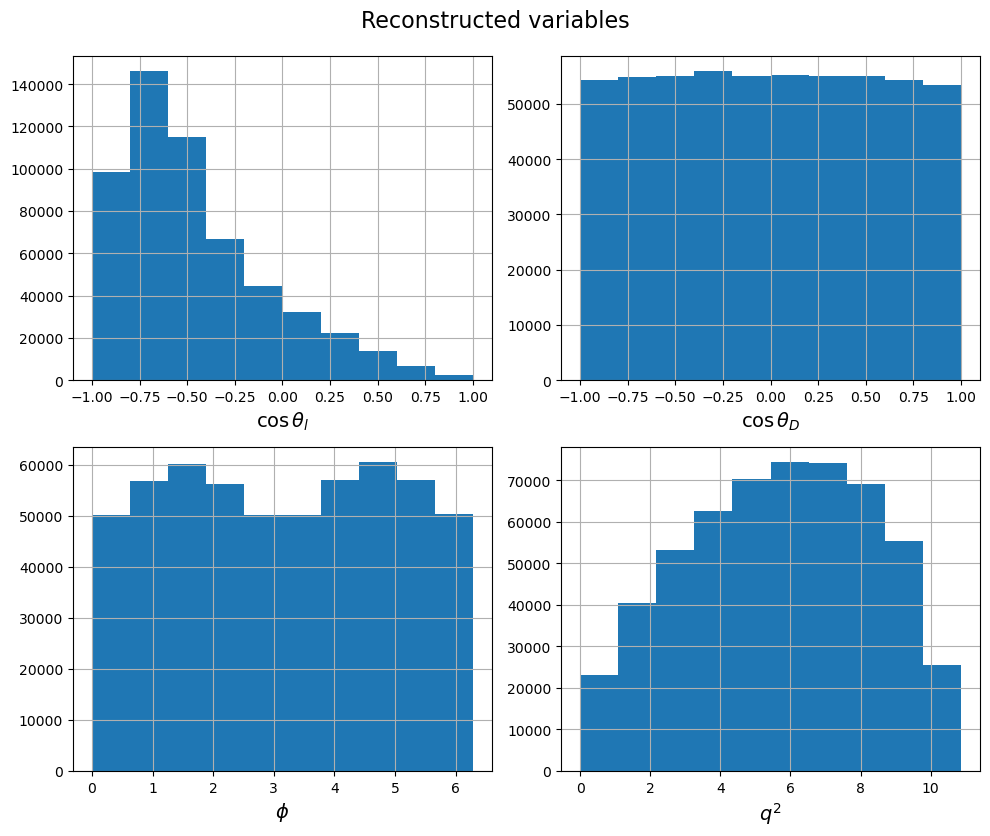

In [51]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Data and titles for the plots
data = [cos_theta_l, cos_theta_d, phi, q2, missing_mass_squared, E_mu_B_frame]
titles = [r'$\cos\theta_l$', r'$\cos\theta_D$', r'$\phi$', r'$q^2$']

# Loop through the data and plot each one
for i, ax in enumerate(axs.flat):
    ax.hist(data[i])
    ax.set_xlabel(titles[i], fontsize = 14)
    

plt.tight_layout()
fig.suptitle('Reconstructed variables', fontsize=16, y=1.04)
plt.savefig('reco_fit_variables.png', dpi=300, bbox_inches='tight')
plt.show()


## Save Results

In [13]:
true_df = pandas.DataFrame({
    'cos_theta_l': cos_theta_l,
    'cos_theta_d': cos_theta_d,
    'phi': phi,
    'q2': q2,
    'missing_mass_squared': missing_mass_squared,
    'E_mu_B_frame': E_mu_B_frame
})
true_df.to_csv('true_fit_variables.csv', index=False)

In [14]:
true_df

,cos_theta_l,cos_theta_d,phi,q2,missing_mass_squared,E_mu_B_frame
0,0.216091,-0.199578,2.053742,1.198325,5.138702e-05,1440.452723
1,-0.821195,0.401584,4.132446,5.873121,-4.035519e-06,1796.253121
2,-0.067958,0.202860,0.413537,6.588492,3.750382e-06,1709.016610
3,0.712409,0.967481,5.674583,4.578238,-2.694675e-05,1066.253507
4,-0.807975,-0.937647,5.607586,6.298352,-4.448021e-05,1826.215964
...,...,...,...,...,...,...
548361,-0.720293,-0.210697,4.331707,7.032409,1.404751e-05,1968.449073
548362,-0.563968,-0.595230,6.004786,4.023475,9.207959e-06,1552.567054
548363,-0.846843,-0.124844,5.082014,8.132841,-1.397293e-05,1919.061308
548364,0.231235,-0.483627,2.737195,1.769118,-3.719726e-07,1822.569251


In [33]:
reco_df = pandas.DataFrame({
    'cos_theta_l': cos_theta_l,
    'cos_theta_d': cos_theta_d,
    'phi': phi,
    'q2': q2,
    'missing_mass_squared': missing_mass_squared,
    'E_mu_B_frame': E_mu_B_frame
})
reco_df.to_csv('reco_fit_variables.csv', index=False)

## 4d histogram binning

In [15]:
def plot_integrated_histogram(df, edges_df, variable):
    assert variable in df.columns, "Invalid variable name!"
    
    # Extract values and weights
    values = df[variable].values
    weights = df['bin_height'].values

    # Get the corresponding bin edges
    edges = np.sort(edges_df[variable].unique())

    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(values, bins=edges, weights=weights, align='mid')
    plt.title(variable)
    plt.grid()
    plt.show()

def bin_4d(df, nbins, ratio=0):
    if df.shape[1] != 4:
        raise ValueError("Input DataFrame must have exactly 4 columns.")

    if ratio > 0:
        df = df.sample(frac=ratio, random_state=42)

    # Compute 4D histogram and edges
    hist, edges = np.histogramdd(df.values, bins=nbins)

    # Compute bin centers and bin edges
    bin_centers = [0.5 * (edges[i][1:] + edges[i][:-1]) for i in range(4)]
    bin_edges = [edges[i] for i in range(4)]

    # Create a grid for bin centers and edges
    xpos, ypos, zpos, wpos = np.meshgrid(*bin_centers, indexing="ij")
    xedge, yedge, zedge, wedge = np.meshgrid(*bin_edges, indexing="ij")

    # Create DataFrame for bin centers and heights
    binned_df = pandas.DataFrame({
        df.columns[0]: xpos.ravel(),
        df.columns[1]: ypos.ravel(),
        df.columns[2]: zpos.ravel(),
        df.columns[3]: wpos.ravel(),
        'bin_height': hist.ravel()
    })

    # Create DataFrame for bin edges
    edges_df = pandas.DataFrame({
        df.columns[0]: xedge.ravel(),
        df.columns[1]: yedge.ravel(),
        df.columns[2]: zedge.ravel(),
        df.columns[3]: wedge.ravel()
    })

    return binned_df, edges_df

In [16]:
variables = ['q2', 'cos_theta_l', 'cos_theta_d', 'phi']
true_data = pandas.DataFrame({
    variables[0]: q2,
    variables[1]: cos_theta_l,
    variables[2]: cos_theta_d,
    variables[3]: phi
})

true_data, edges = bin_4d(true_data, 10)

display(true_data)
true_data.to_csv('true_binned_variables.csv', index=False)


,q2,cos_theta_l,cos_theta_d,phi,bin_height
0,0.546463,-0.900004,-0.900000,0.314166,185.0
1,0.546463,-0.900004,-0.900000,0.942482,83.0
2,0.546463,-0.900004,-0.900000,1.570798,13.0
3,0.546463,-0.900004,-0.900000,2.199113,0.0
4,0.546463,-0.900004,-0.900000,2.827429,1.0
...,...,...,...,...,...
9995,10.153466,0.899917,0.899994,3.455745,1.0
9996,10.153466,0.899917,0.899994,4.084061,2.0
9997,10.153466,0.899917,0.899994,4.712376,5.0
9998,10.153466,0.899917,0.899994,5.340692,5.0


In [ ]:
variables = ['q2', 'cos_theta_l', 'cos_theta_d', 'phi']
reco_data = pandas.DataFrame({
    variables[0]: q2,
    variables[1]: cos_theta_l,
    variables[2]: cos_theta_d,
    variables[3]: phi
})

reco_data, edges = bin_4d(reco_data, 10)

display(reco_data)
reco_data.to_csv('reco_binned_variables.csv', index=False)

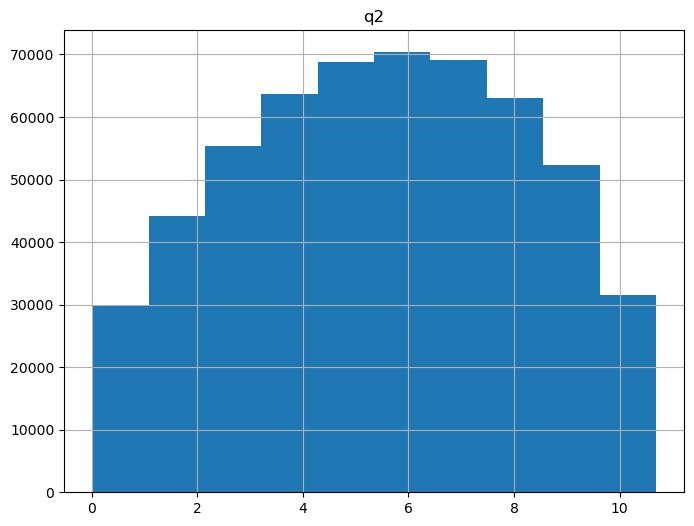

In [18]:
plot_integrated_histogram(true_data, edges, 'q2')

## Validations

In [22]:
B_in_B = lorentz_boost_lvec(B_momentum,B_momentum, valid_indices).T

array([5279.58009694, 5279.58009694, 5279.58009694, ..., 5279.58009694,
       5279.58009694, 5279.58009694])

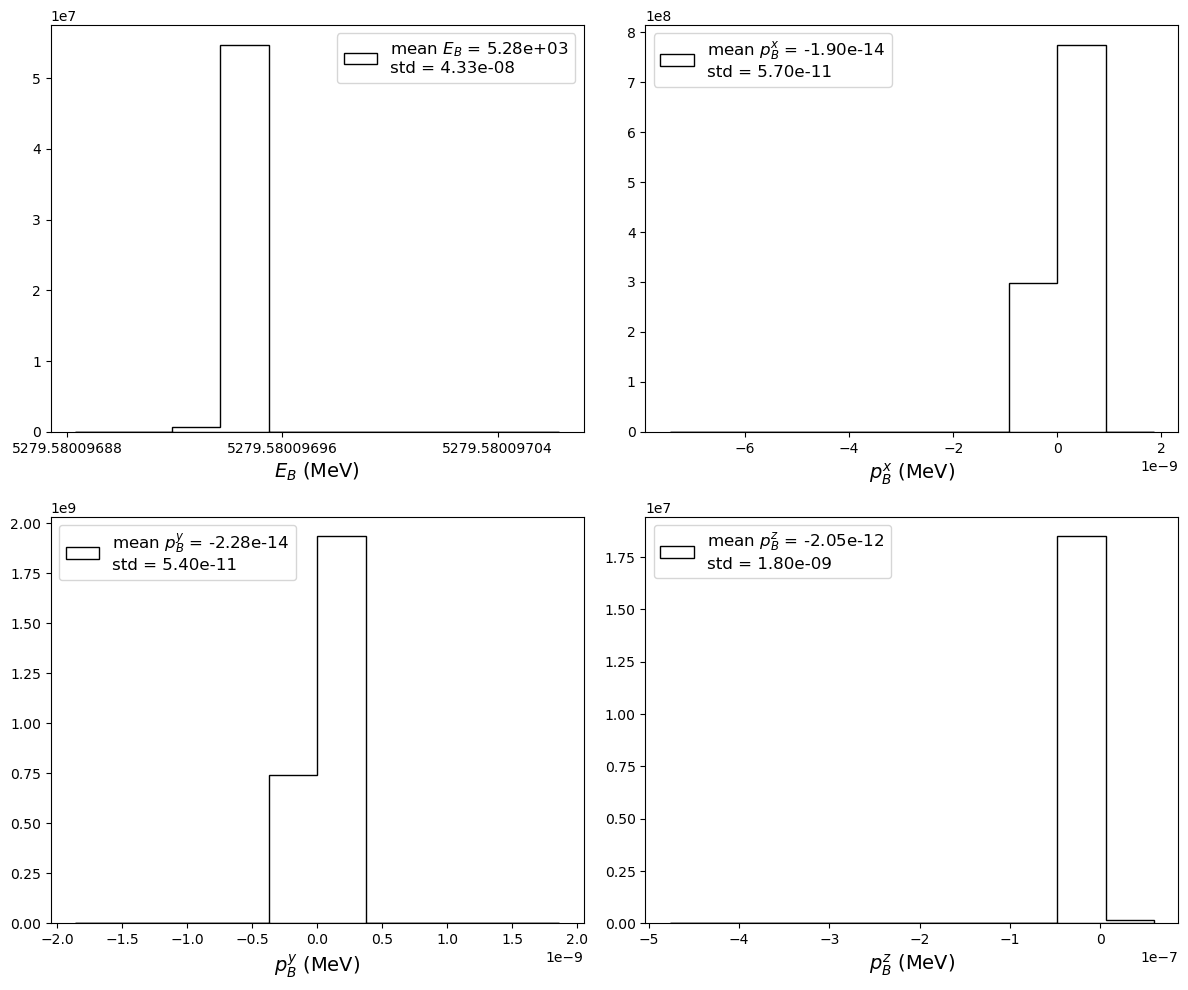

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Helper function to format std in scientific notation
def format_mean(val):
    return f"{val:.2e}"

def format_std(val):
    return f"{val:.2e}"

# Plot for B_in_B[0]
axs[0, 0].hist(B_in_B[0], density=True, histtype='stepfilled', edgecolor='black', alpha=1, facecolor='white',
               label=fr"mean $E_B$ = {format_mean(B_in_B.mean(axis=1)[0])}" + "\n" + r"std = " + format_std(B_in_B.std(axis=1)[0]))
axs[0, 0].xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axs[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=3))
axs[0, 0].legend(fontsize=12)
axs[0, 0].set_xlabel(r"$E_B$ (MeV)", fontsize=14)

# Plot for B_in_B[1]
axs[0, 1].hist(B_in_B[1], density=True, histtype='stepfilled', edgecolor='black', alpha=1, facecolor='white',
               label=fr"mean $p_B^x$ = {format_mean(B_in_B.mean(axis=1)[1])}" + "\n" + r"std = " + format_std(B_in_B.std(axis=1)[1]))
axs[0, 1].legend(fontsize=12)
axs[0, 1].set_xlabel(r"$p_B^x$ (MeV)", fontsize=14)

# Plot for B_in_B[2]
axs[1, 0].hist(B_in_B[2], density=True, histtype='stepfilled', edgecolor='black', alpha=1, facecolor='white',
               label=fr"mean $p_B^y$ = {format_mean(B_in_B.mean(axis=1)[2])}" + "\n" + r"std = " + format_std(B_in_B.std(axis=1)[2]))
axs[1, 0].legend(fontsize=12)
axs[1, 0].set_xlabel(r"$p_B^y$ (MeV)", fontsize=14)

# Plot for B_in_B[3]
axs[1, 1].hist(B_in_B[3], density=True, histtype='stepfilled', edgecolor='black', alpha=1, facecolor='white',
               label=fr"mean $p_B^z$ = {format_mean(B_in_B.mean(axis=1)[3])}" + "\n" + r"std = " + format_std(B_in_B.std(axis=1)[3]))
axs[1, 1].legend(fontsize=12)
axs[1, 1].set_xlabel(r"$p_B^z$ (MeV)", fontsize=14)

plt.tight_layout()
plt.savefig('B_in_B.png', dpi=300, bbox_inches='tight')
plt.show()


In [140]:
B_in_B = lorentz_boost_lvec(B_momentum,B_momentum, valid_indices).T
Dstar_in_Dstar = lorentz_boost_lvec(Dstar_momentum,Dstar_momentum, valid_indices).T
mu_in_mu = lorentz_boost_lvec(mu_momentum,mu_momentum, valid_indices).T
D0_in_D0 = lorentz_boost_lvec(D0_momentum,D0_momentum, valid_indices).T
slpi_in_slpi = lorentz_boost_lvec(slpi_momentum,slpi_momentum, valid_indices).T

In [141]:
B_in_B_mean = B_in_B.mean(axis=1)
Dstar_in_Dstar_mean = Dstar_in_Dstar.mean(axis=1)
mu_in_mu_mean = mu_in_mu.mean(axis=1)
D0_in_D0_mean = D0_in_D0.mean(axis=1)
slpi_in_slpi_mean = slpi_in_slpi.mean(axis=1)
data = {
    "B_in_B_mean": B_in_B_mean,
    "Dstar_in_Dstar_mean": Dstar_in_Dstar_mean,
    "mu_in_mu_mean": mu_in_mu_mean,
    "D0_in_D0_mean": D0_in_D0_mean,
    "slpi_in_slpi_mean": slpi_in_slpi_mean
}

df_means = pandas.DataFrame(data)
display(df_means)

,B_in_B_mean,Dstar_in_Dstar_mean,mu_in_mu_mean,D0_in_D0_mean,slpi_in_slpi_mean
0,5.279580e+03,2.010268e+03,1.056585e+02,1.864840e+03,1.394155e+02
1,-1.896519e-14,8.772953e-14,-6.653423e-13,5.330236e-14,1.025459e-15
2,-2.282337e-14,-4.945051e-14,1.758461e-13,-5.005934e-14,2.271669e-15
3,-2.047930e-12,-2.319322e-14,-1.729771e-11,-4.096761e-13,-7.242906e-14


In [125]:
B_in_B = lorentz_boost_lvec(B_momentum,B_momentum, valid_indices)
Dstar_in_B = lorentz_boost_lvec(Dstar_momentum,B_momentum, valid_indices)
mu_in_B = lorentz_boost_lvec(mu_momentum,B_momentum, valid_indices)
D0_in_B = lorentz_boost_lvec(D0_momentum,B_momentum, valid_indices)
slpi_in_B = lorentz_boost_lvec(slpi_momentum,B_momentum, valid_indices)

B_in_Dstar = lorentz_boost_lvec(B_momentum,Dstar_momentum, valid_indices)
Dstar_in_Dstar = lorentz_boost_lvec(Dstar_momentum,Dstar_momentum, valid_indices)
mu_in_Dstar = lorentz_boost_lvec(mu_momentum,Dstar_momentum, valid_indices)
D0_in_Dstar = lorentz_boost_lvec(D0_momentum,Dstar_momentum, valid_indices)
slpi_in_Dstar = lorentz_boost_lvec(slpi_momentum,Dstar_momentum, valid_indices)


In [128]:
p2B_in_B = np.sqrt(invariant_mass_squared(B_in_B))
p2Dstar_in_B = np.sqrt(invariant_mass_squared(Dstar_in_B))
p2mu_in_B = np.sqrt(invariant_mass_squared(mu_in_B))
p2D0_in_B = np.sqrt(invariant_mass_squared(D0_in_B))
p2slpi_in_B = np.sqrt(invariant_mass_squared(slpi_in_B))

p2B_in_Dstar = np.sqrt(invariant_mass_squared(B_in_Dstar))
p2Dstar_in_Dstar = np.sqrt(invariant_mass_squared(Dstar_in_Dstar))
p2mu_in_Dstar = np.sqrt(invariant_mass_squared(mu_in_Dstar))
p2D0_in_Dstar = np.sqrt(invariant_mass_squared(D0_in_Dstar))
p2slpi_in_Dstar = np.sqrt(invariant_mass_squared(slpi_in_Dstar))


In [136]:
mean_df = pandas.DataFrame({
    "B ": [p2B_in_B.mean(), p2B_in_Dstar.mean()],
    "Dstar": [p2Dstar_in_B.mean(), p2Dstar_in_Dstar.mean()],
    "mu": [p2mu_in_B.mean(), p2mu_in_Dstar.mean()],
    "D0": [p2D0_in_B.mean(), p2D0_in_Dstar.mean()],
    "slpi": [p2slpi_in_B.mean(), p2slpi_in_Dstar.mean()],
})
mean_df.index = ["B Frame", "Dstar Frame"]
display(mean_df)


,B,Dstar,mu,D0,slpi
B Frame,5279.580097,2010.267952,105.658495,1864.83994,139.415482
Dstar Frame,5279.580097,2010.267952,105.658495,1864.83994,139.415482
